In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = r"C:\Users\Asus\OneDrive\Desktop\Data Analysis Project 2\E-commerce Customer Behavior - Sheet1.csv"

In [3]:
df = pd.read_csv(path)
df.set_index("Customer ID")

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Customer ID,,,,,,,,,,
101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied


In [4]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
df.shape

(350, 11)

# Data Cleaning

In [6]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [9]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [10]:
df.duplicated().sum()

np.int64(0)

# Data Exploration

In [11]:
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [12]:
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,Male,175
1,Female,173


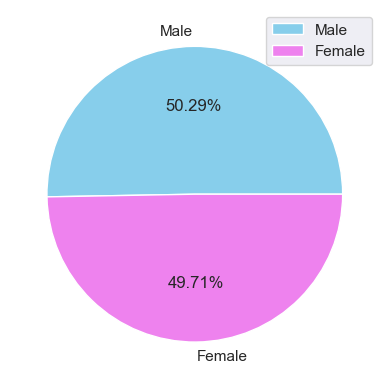

In [209]:
plt.pie(Gender['count'],
       colors = ['skyblue', 'violet'],
       labels = Gender['Gender'],
        autopct='%1.2f%%')
        
plt.legend(loc = 'upper right')
plt.show()

In [14]:
CitywisePurchase = df.groupby('City')['Total Spend'].sum()
CitywisePurchase.reset_index()

,City,Total Spend
0,Chicago,28993.2
1,Houston,25068.3
2,Los Angeles,47524.0
3,Miami,40042.6
4,New York,68737.1
5,San Francisco,84666.8


color = (0.9, 0.2, 0.2, 0.9) 

CitywisePurchase.plot(kind='bar',
                     color = color)

## Analysis
- Houston had the lowest number of purchases company can improve the sales by implementing sales in their branches in that city


# Were the customers who bought Premium membership actually more satisfied?

In [192]:
PremiumMembership = df.groupby("Membership Type")['Satisfaction Level'].value_counts()
table = PremiumMembership.unstack(fill_value = 0)

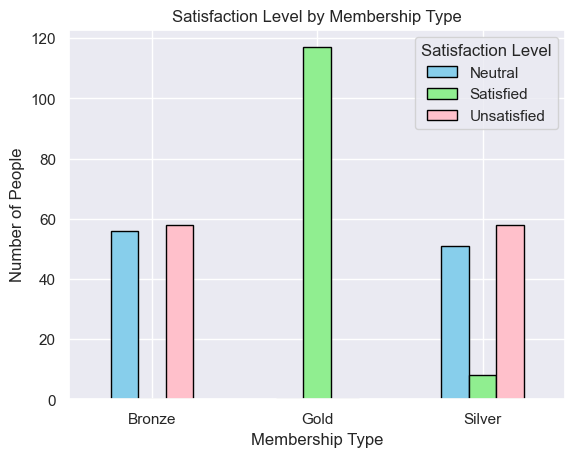

In [207]:
table.plot(kind = 'bar', 
           color = ['skyblue', 'lightgreen', 'pink'],
          edgecolor = 'black')

plt.ylabel("Number of People")
plt.title("Satisfaction Level by Membership Type")
plt.xticks(rotation=0)
plt.show()

In [50]:
df['Membership Type'].value_counts()

Membership Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64

# Gender-wise  Membership 

In [51]:
GenderwiseMembership = df.groupby('Gender')['Membership Type'].value_counts()
table = GenderwiseMembership.unstack(fill_value = 0)

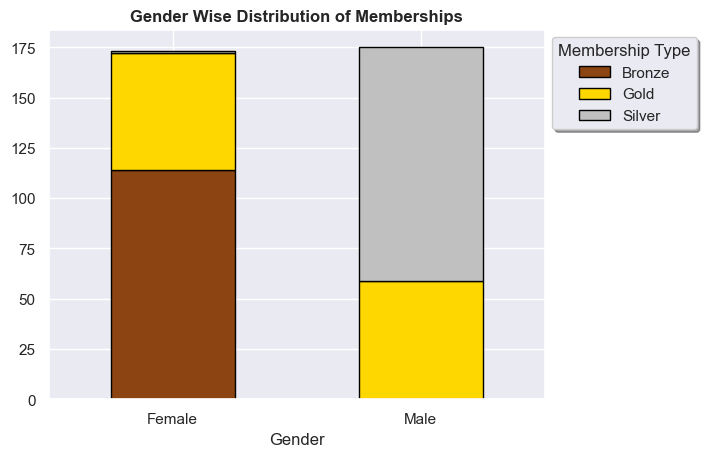

In [147]:
brown =(0.55, 0.27, 0.07)
table.plot(kind='bar', 
           stacked=True,
           color = [brown, 'gold', 'silver'],
           edgecolor='black')

plt.legend(title="Membership Type", 
           bbox_to_anchor=(1, 1), 
           loc='upper left',
          shadow = True,
          frameon = True)
plt.xticks(rotation = 0)
plt.title("Gender Wise Distribution of Memberships", weight = 'bold')
plt.xlabel("Gender")
plt.show()

In [118]:
AvgRatings = df['Average Rating']
AvgRatings.max()

4.9

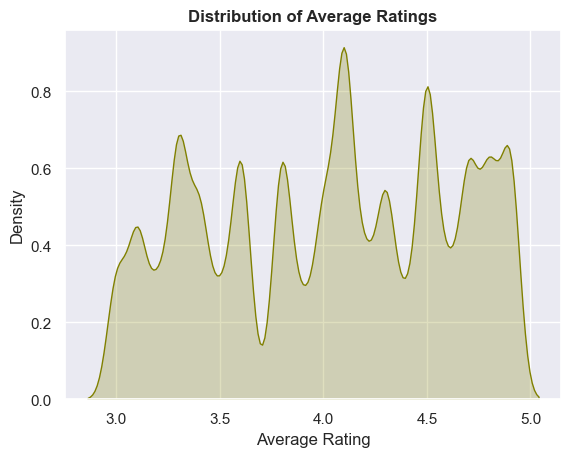

In [185]:
sns.set_theme(style="darkgrid")
sns.kdeplot(x = AvgRatings, 
            fill=True, 
            color="olive",
            linewidth=1,
            bw_method = 0.08)

plt.title("Distribution of Average Ratings", weight = 'bold')
plt.xlabel("Average Rating")
plt.show()

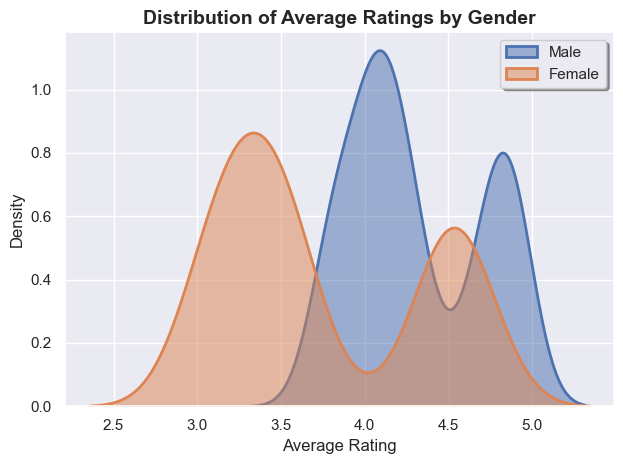

In [143]:
MaleRatings = df[df['Gender'] == 'Male']['Average Rating']
FemaleRatings = df[df['Gender'] == 'Female']['Average Rating']

sns.kdeplot(MaleRatings,
            fill=True,
            color="#4C72B0",  
            alpha=0.5,
            linewidth=2,
            label="Male")

sns.kdeplot(FemaleRatings,
            fill=True,
            color="#DD8452",   
            alpha=0.5,
            linewidth=2,
            label="Female")

plt.title("Distribution of Average Ratings by Gender", fontsize=14, weight='bold')
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()


# Were discounts really beneficial??

In [162]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [172]:
DiscApplyvsSatLvl = df.groupby('Discount Applied')['Satisfaction Level'].value_counts().unstack(fill_value=0)
DiscApplyvsSatLvl

Satisfaction Level,Neutral,Satisfied,Unsatisfied
Discount Applied,,,
False,107,66,0
True,0,59,116


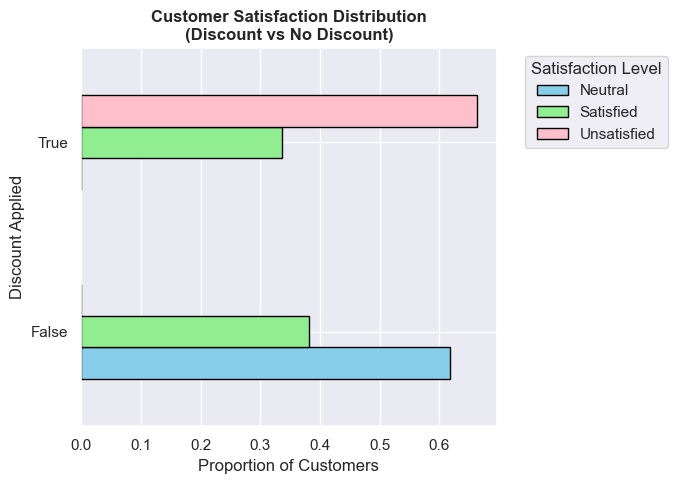

In [187]:

table_pct = DiscApplyvsSatLvl.div(DiscApplyvsSatLvl.sum(axis=1), axis=0)
table_pct.plot(kind='barh',
               color = ['skyblue', 'lightgreen', 'pink'],
               figsize=(7,5),
               edgecolor = 'black',
 
              )

plt.title("Customer Satisfaction Distribution\n(Discount vs No Discount)", weight='bold')
plt.xlabel("Proportion of Customers")
plt.legend(title="Satisfaction Level", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


In [196]:
AvgItemsPurchasedByGender = df.groupby('Gender')['Items Purchased'].mean()
AvgItemsPurchasedByGender

Gender
Female    10.803468
Male      14.440000
Name: Items Purchased, dtype: float64

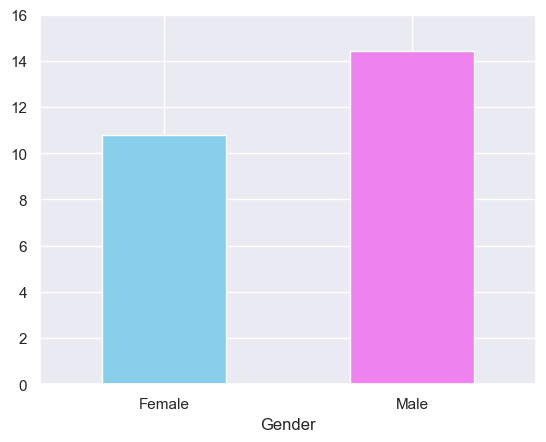

In [210]:
AvgItemsPurchasedByGender.plot(kind ='bar',
                              color = ['skyblue', 'violet'])
plt.ylim(0,16)
plt.xticks(rotation = 0)
plt.show()